In [3]:
import numpy as np 
import matplotlib.pyplot as plt

#let's generate a theoretical signal

t1 = 0 #start time
t2 = 100 #end time
dt = 0.01 #time step

time_vector = np.arange(t1, t2, dt) #define the time vector
#time_vector

#Model the Signal 
signal = np.sin(time_vector/2)

#Add noise to the signal
noise_level = 1 #amount of noise
background_max = 3 #maximum value of the background noise

#Create a noisy signal with background noise
noisy_signal = signal + (-(time_vector**2) + t2 * time_vector)/(t2**2/4)*background_max + noise_level*np.random.randn(len(time_vector))


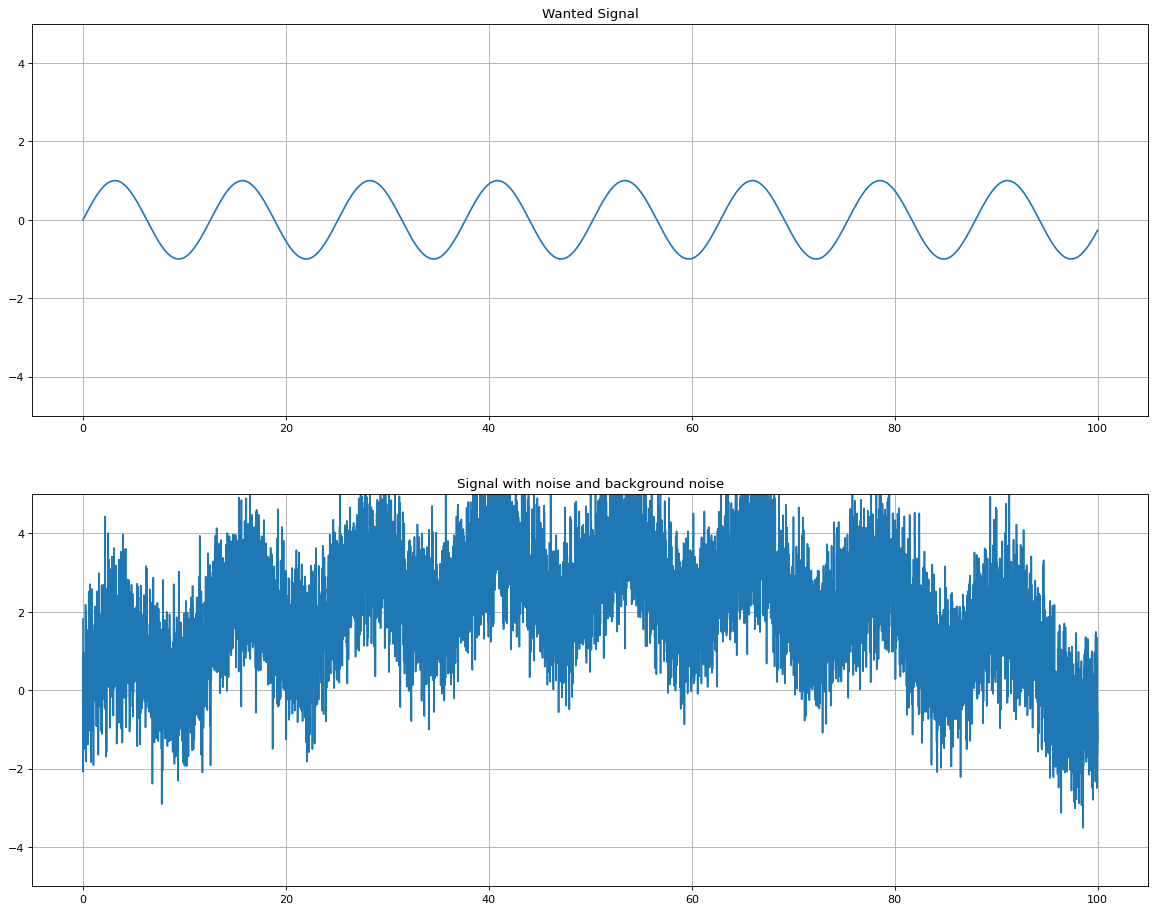

In [4]:
#Plot the signal

fig = plt.figure(num=None, figsize=(18, 14), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.plot(time_vector, signal,)
plt.grid()
plt.ylim(-5, 5)
plt.title("Wanted Signal")
plt.subplot(2,1,2)
plt.plot(time_vector, noisy_signal)
plt.title("Signal with noise and background noise")
plt.grid()
plt.ylim(-5, 5)
plt.show()

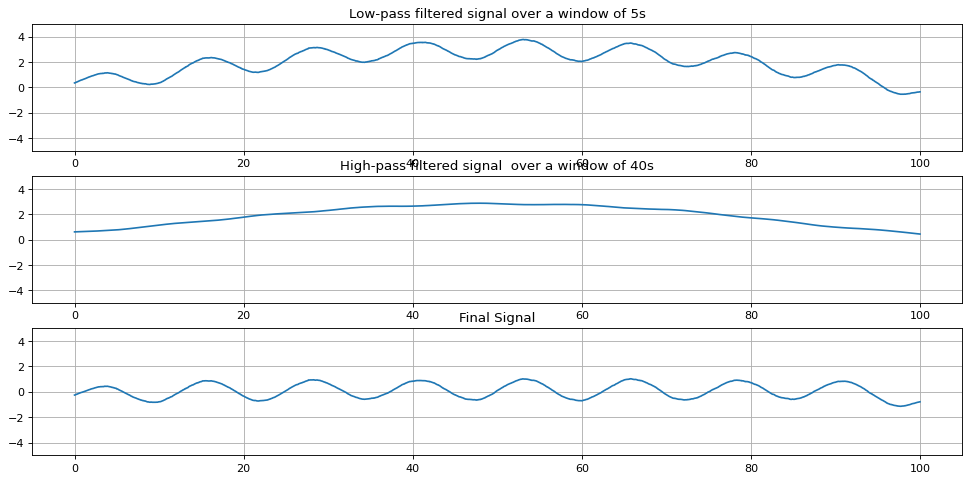

In [5]:
#Method1: Running mean
#First define how long is the window in the running mean

T1 = 5 #start time
W1 = int(T1/dt) #number of data points in the first window for low pass filtering

T2 = 40 #start time
W2 = int(T2/dt) #number of data points in the Second window for high pass filtering

#Calculate the running means (filtred Signals)

mean_signal = np.convolve(noisy_signal, np.ones(W1)/W1, mode='same') #Averaging over the period of Window 1
mean_signal2 = np.convolve(noisy_signal, np.ones(W2)/W2, mode='same') #Averaging over the period of Window 2
final_signal = mean_signal - mean_signal2

#Plot the results
fig = plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3,1,1)
plt.plot(time_vector, mean_signal)
plt.grid()
plt.ylim(-5, 5)
plt.title("Low-pass filtered signal over a window of 5s")
plt.subplot(3,1,2)
plt.plot(time_vector, mean_signal2)
plt.title("High-pass filtered signal  over a window of 40s")
plt.grid()
plt.ylim(-5, 5)
plt.subplot(3,1,3)
plt.plot(time_vector, final_signal)
plt.title("Final Signal")
plt.grid()
plt.ylim(-5, 5)
plt.show()


In [8]:

from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

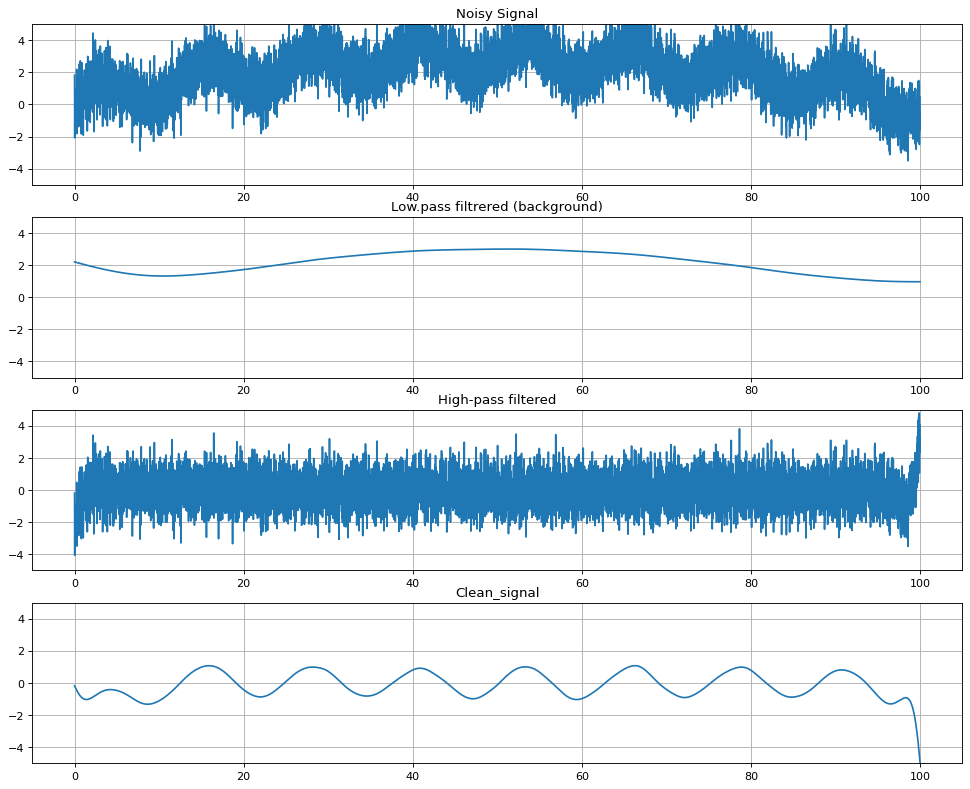

In [14]:
#Method2: Frequency based filtering

order = 2 #order of the filter
fs = 1/dt #sampling frequency
nyq = 0.5 * fs #Nyquist frequency
lowcut = 0.1 #Low cut frequency
low_cutoff = 1/40 #Low pass frequency
high_cutoff = 1/5 #High cut frequency

lowpass_filtred = butter_lowpass_filter(noisy_signal, low_cutoff, fs, nyq, order)
highpass_filtred = butter_highpass_filter(noisy_signal, high_cutoff, fs, nyq, order)

clean_signal = noisy_signal - lowpass_filtred - highpass_filtred 

#Plot the results
fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(4,1,1)
plt.plot(time_vector, noisy_signal)
plt.grid()
plt.ylim(-5, 5)
plt.title("Noisy Signal")
plt.subplot(4,1,2)
plt.plot(time_vector, lowpass_filtred)
plt.title("Low.pass filtrered (background)")
plt.grid()
plt.ylim(-5, 5)
plt.subplot(4,1,3)
plt.plot(time_vector, highpass_filtred)
plt.title("High-pass filtered")
plt.grid()
plt.ylim(-5, 5)
plt.subplot(4,1,4)
plt.plot(time_vector, clean_signal)
plt.title("Clean_signal")
plt.grid()
plt.ylim(-5, 5)
plt.show()

Text(0.5, 1.0, 'Filtered Signal')

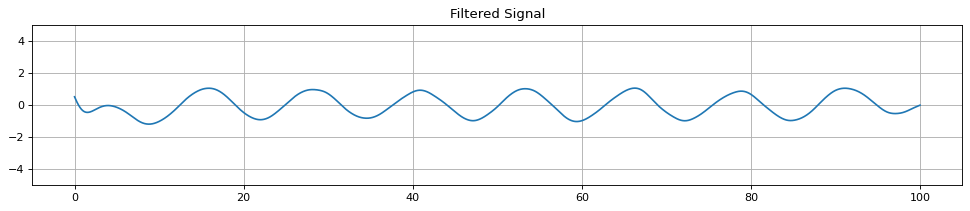

In [17]:
cutoff_H = 1/40 #Highpass cutoff frequency
cutoff_L = 1/5 #Lowpass cutoff frequency
#After this filterning we will have only frequrncies between 1/40 and 1/5


lowpass_filtred2 = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)#filter the signal with a High frequencies
final_signal2 = butter_highpass_filter(lowpass_filtred2, cutoff_H, fs, nyq, order)#filter the signal with a Low frequencies

fig = plt.figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(4,1,1)
plt.plot(time_vector, final_signal2)
plt.grid()
plt.ylim(-5, 5)
plt.title("Filtered Signal")